EDA
colab github 연동 테스트입니다.
수정사항

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/WASSUP/project/train_modified.csv')

In [4]:
train_data.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,Male,Asian,Stable,No,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,Male,Hispanic,Stable,No,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,Female,Black,Unstable,No,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,Female,Black,Stable,Yes,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,1,Male,White,Stable,Yes,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


In [5]:
train_data.describe()

,Diagnosis,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9516.000000,10000.000000,9461.000000,10000.000000,10000.000000,10000.000000,9799.000000
mean,0.503600,6.485137,7.339722,7.019229,5.495094,5.004880,5.684392,6.507784,4.660375,2.639820,2.769270,3.979344,4.875879,4.892598,2.503921,6.248728
std,0.500012,1.111695,1.135760,0.995286,1.121692,0.995302,1.889586,1.110032,1.103300,1.078949,1.084593,1.130747,0.977009,1.695571,0.985240,2.268198
min,0.000000,2.361254,3.007422,3.104940,1.152386,1.629374,0.457384,1.844317,0.848507,1.000022,1.000629,1.015541,1.039531,1.003486,1.000238,0.502300
25%,0.000000,5.723042,6.556735,6.350163,4.738076,4.336195,4.246898,5.752434,3.915314,1.748510,1.917813,3.179104,4.225069,3.528066,1.707915,4.448838
50%,1.000000,6.467649,7.355944,7.021443,5.487237,5.003497,5.340179,6.509457,4.686469,2.477999,2.642702,3.983952,4.906347,5.479616,2.372742,6.330896
75%,1.000000,7.248700,8.139588,7.696230,6.254233,5.686767,7.282476,7.276955,5.426938,3.411670,3.486268,4.779751,5.577368,6.266723,3.164034,8.209953
max,1.000000,9.939766,9.996840,9.982799,9.359651,8.737019,9.999307,9.857221,8.773658,6.971974,6.928617,6.996624,6.999574,6.999820,6.494824,9.999722


In [6]:
# 결측치 확인
train_data.isna().sum()

Diagnosis           0
Sex                 0
Race                0
Housing             0
Delay               0
Anhedonia           0
DepMood             0
Sleep               0
Tired               0
Appetite            0
Rumination          0
Concentration       0
Psychomotor         0
Delusion          484
Suspicious          0
Withdrawal        539
Passive             0
Tension             0
UnusualThought      0
Income            201
dtype: int64

In [7]:
df=train_data.copy()
# 문자열형 변수를 numeric으로 변경
train_data['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
train_data['Sex'] = train_data['Sex'].map({'Male' : 0, 'Female' : 1})

In [9]:
train_data['Race'].unique()

array(['Asian', 'Hispanic', 'Black', 'White'], dtype=object)

In [10]:
train_data['Race'] = train_data['Race'].map({'Asian' : 0, 'Hispanic' : 1, 'Black' : 2, 'White' : 3})

In [11]:
train_data['Housing'].unique()

array(['Stable', 'Unstable'], dtype=object)

In [12]:
train_data['Housing'] = train_data['Housing'].map({'Unstable' : 0, 'Stable' : 1})

In [13]:
train_data['Delay'] = train_data['Delay'].map({'No' : 0, 'Yes' : 1})

In [14]:
train_data.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,0,0,1,0,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,0,1,1,0,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,1,2,0,0,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,1,2,1,1,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,1,0,3,1,1,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


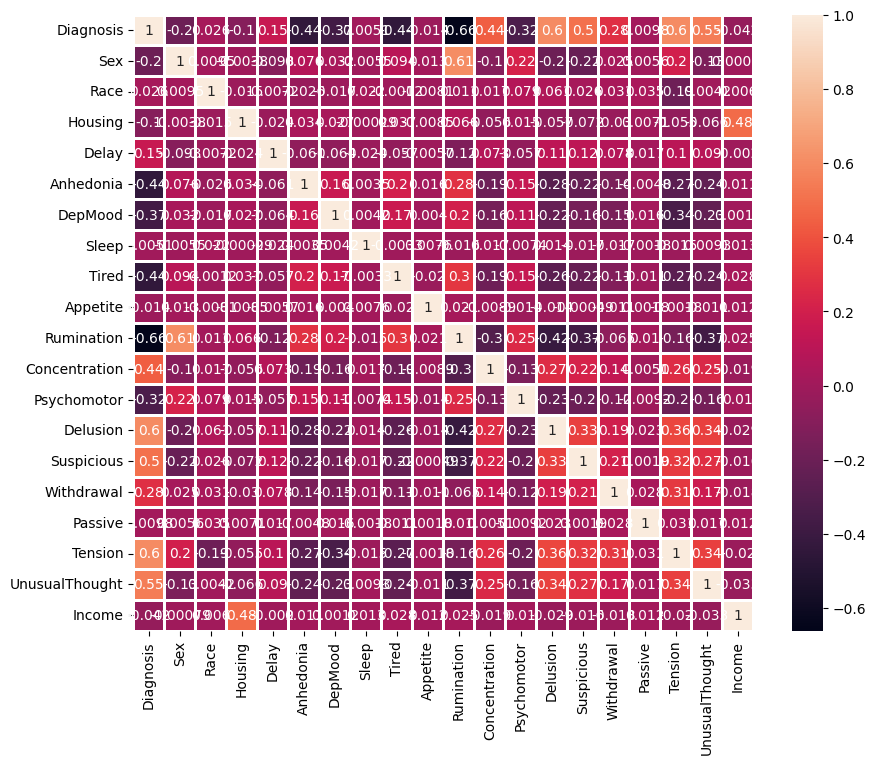

In [15]:
# feature 간 상관관계를 먼저 파악
correlation_matrix = train_data.corr(numeric_only = True)

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, linewidths = 1)

plt.show()

In [16]:
train_data.corr()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
Diagnosis,1.000000,-0.196906,0.026488,-0.101999,0.154471,-0.443948,-0.369675,0.005139,-0.443615,-0.014447,-0.660732,0.442067,-0.324652,0.604086,0.502714,0.278118,0.009804,0.603452,0.550762,-0.041637
Sex,-0.196906,1.000000,0.009541,-0.003760,-0.093283,0.075853,0.031671,-0.005460,0.093865,0.013227,0.605359,-0.101858,0.221225,-0.196724,-0.218809,0.025418,0.005646,0.196368,-0.133153,-0.000787
Race,0.026488,0.009541,1.000000,-0.015026,-0.007208,-0.025865,-0.016731,0.021957,-0.001215,-0.008126,0.010722,0.016896,0.078643,0.061173,0.025572,0.031015,0.035262,-0.188483,0.004214,0.005972
Housing,-0.101999,-0.003760,-0.015026,1.000000,-0.024090,0.034102,0.027250,-0.000288,0.036786,-0.008546,0.065960,-0.056489,0.014577,-0.056873,-0.071526,-0.029706,0.007120,-0.054841,-0.065549,0.484558
Delay,0.154471,-0.093283,-0.007208,-0.024090,1.000000,-0.060752,-0.063878,-0.023771,-0.056971,-0.005743,-0.124551,0.072779,-0.056971,0.113937,0.117493,0.077507,0.017006,0.104187,0.090462,-0.002014
Anhedonia,-0.443948,0.075853,-0.025865,0.034102,-0.060752,1.000000,0.161364,0.003530,0.202938,0.015844,0.283677,-0.190118,0.146698,-0.279043,-0.223530,-0.136310,-0.004815,-0.268815,-0.241796,0.011227
DepMood,-0.369675,0.031671,-0.016731,0.027250,-0.063878,0.161364,1.000000,0.004213,0.168357,0.003986,0.198059,-0.157374,0.112573,-0.223257,-0.156303,-0.145439,0.016007,-0.336385,-0.234584,0.001163
Sleep,0.005139,-0.005460,0.021957,-0.000288,-0.023771,0.003530,0.004213,1.000000,-0.003298,0.007628,-0.014992,0.017481,-0.007376,0.013665,-0.016533,-0.017320,-0.001792,-0.014530,0.009330,0.013265
Tired,-0.443615,0.093865,-0.001215,0.036786,-0.056971,0.202938,0.168357,-0.003298,1.000000,-0.020323,0.300167,-0.190638,0.145553,-0.260435,-0.223639,-0.112713,-0.010533,-0.265333,-0.237699,0.028097
Appetite,-0.014447,0.013227,-0.008126,-0.008546,-0.005743,0.015844,0.003986,0.007628,-0.020323,1.000000,0.020818,-0.008896,-0.014494,-0.013524,-0.000487,-0.010850,0.001793,-0.001763,-0.011039,0.012281


상관 분석 결과 Housing과 income이 0.48로 강한 상관관계가 있는 것 같다.
두 변수에 대해 더 분석이 필요하다

In [17]:
# 분석을 위해 결측치를 삭제한다
df1=train_data
df1=df1.dropna(subset=['Income'])
df1.loc[df1.Housing == 1, ['Income']]

,Income
0,8.730176
1,4.675389
3,4.812903
4,8.012474
5,7.827365
...,...
9991,7.816308
9995,6.886743
9996,7.207596
9997,7.304441


In [18]:
df1.loc[df1.Housing == 1, ['Income']].describe()

,Income
count,9261.000000
mean,6.513619
std,2.033528
min,3.000621
25%,4.741808
50%,6.574209
75%,8.298827
max,9.999722


Housing이 1 즉 Stable인 값들을 살펴보면 대략 3~6.5 값을 가지고 있음을 알 수 있다

In [19]:
df1.loc[df1.Housing == 0, ['Income']].describe()

,Income
count,538.000000
mean,1.688962
std,0.722184
min,0.502300
25%,1.081866
50%,1.631260
75%,2.298976
max,2.999501


Housing이 0 즉 Unstable인 값들을 살펴보면 대략 0.5~3 값을 가지고 있음을 알 수 있다.
이를 시각화하여 나타내면

<Figure size 800x500 with 0 Axes>

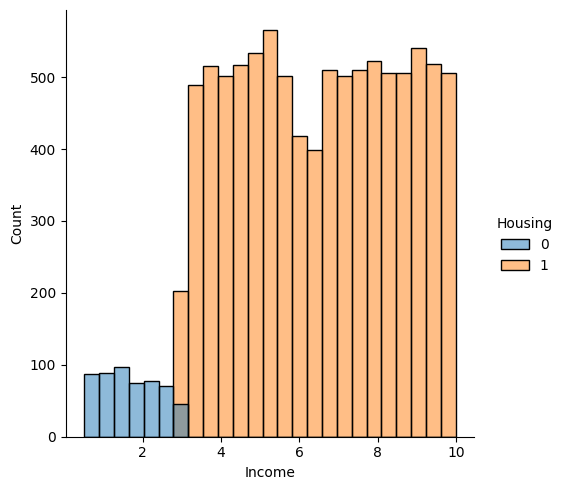

In [20]:
# Income 값과 Housing 값의 분포를 알아보자
plt.figure(figsize=(8, 5))
sns.displot(df1,x='Income',hue='Housing', bins=25)

### 시각화 결과 특정 Income값을 경계로 Housing 변수의 값이 나누어진다는 것을 확인할 수 있다.
### 즉 Housing과 Income은 동일한 의미라고 판단 할 수 있으며
###본 프로젝트에서는 타겟 변수와 상관도가 더 높은 Housing 변수만 사용하기로 결정했다.

In [21]:
df1['Housing'].value_counts()

1    9261
0     538
Name: Housing, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by housing')

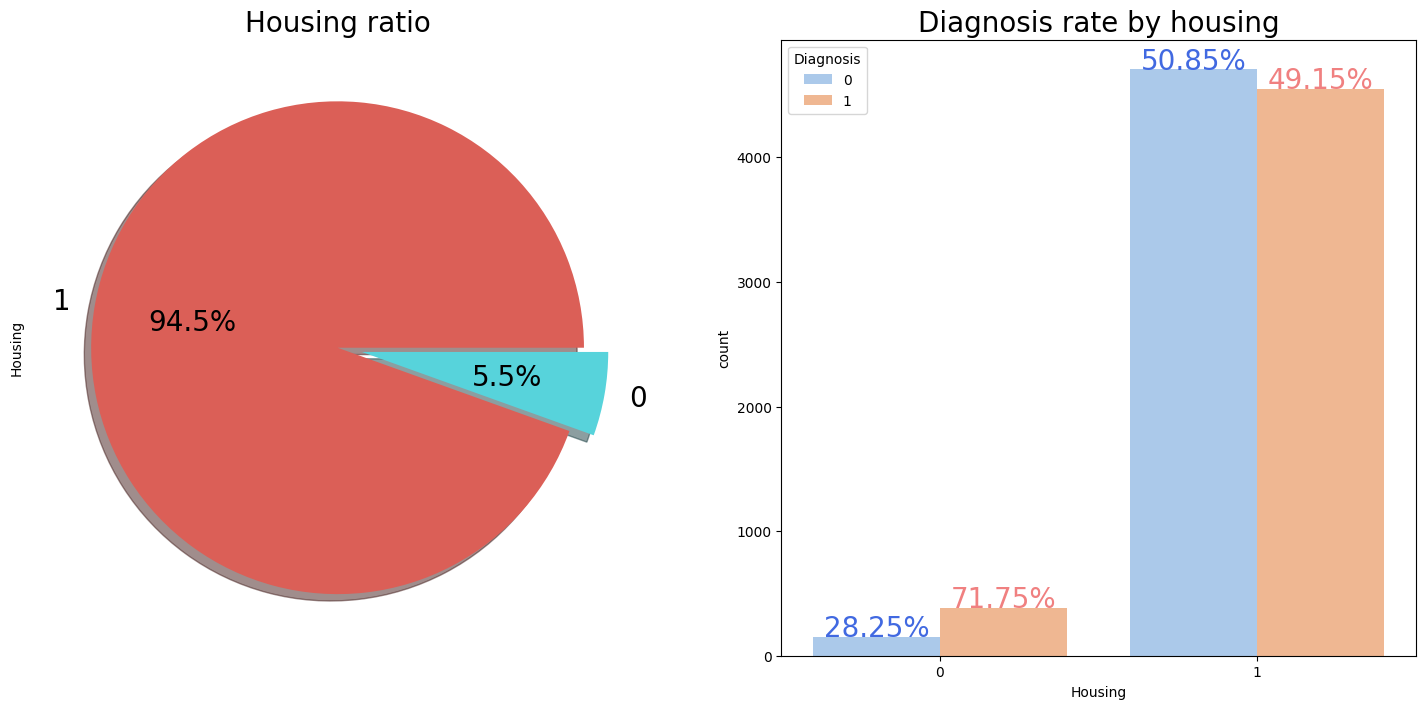

In [22]:
# Housing 별 진단률
color = sns.color_palette('hls',len(df1['Housing'].value_counts()))
ct_sex = pd.crosstab(df1['Housing'], df1['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df1['Housing'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Housing ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Housing', hue = 'Diagnosis', data = df1, ax=ax[1],palette=palette1)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        if int(p.get_x()+0.5) ==0:
            cnt+=1
        if cnt==2 and int(p.get_x()+0.5)==0:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[int(p.get_x()+0.5)]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=20)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by housing",fontsize=20)

Text(0.5, 1.0, 'Diagnosis rate')

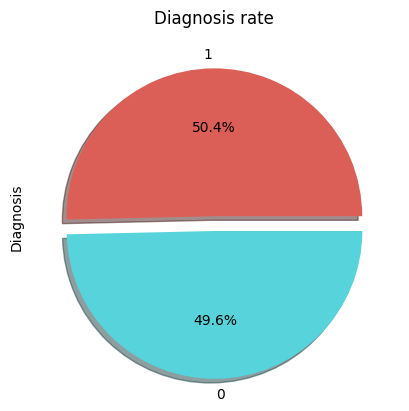

In [23]:
# 환자 비율 확인
color = sns.color_palette('hls',len(train_data['Diagnosis'].value_counts()))
p=train_data['Diagnosis'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=color)
p.set_title("Diagnosis rate")

Text(0.5, 1.0, 'Diagnosis rate by gender')

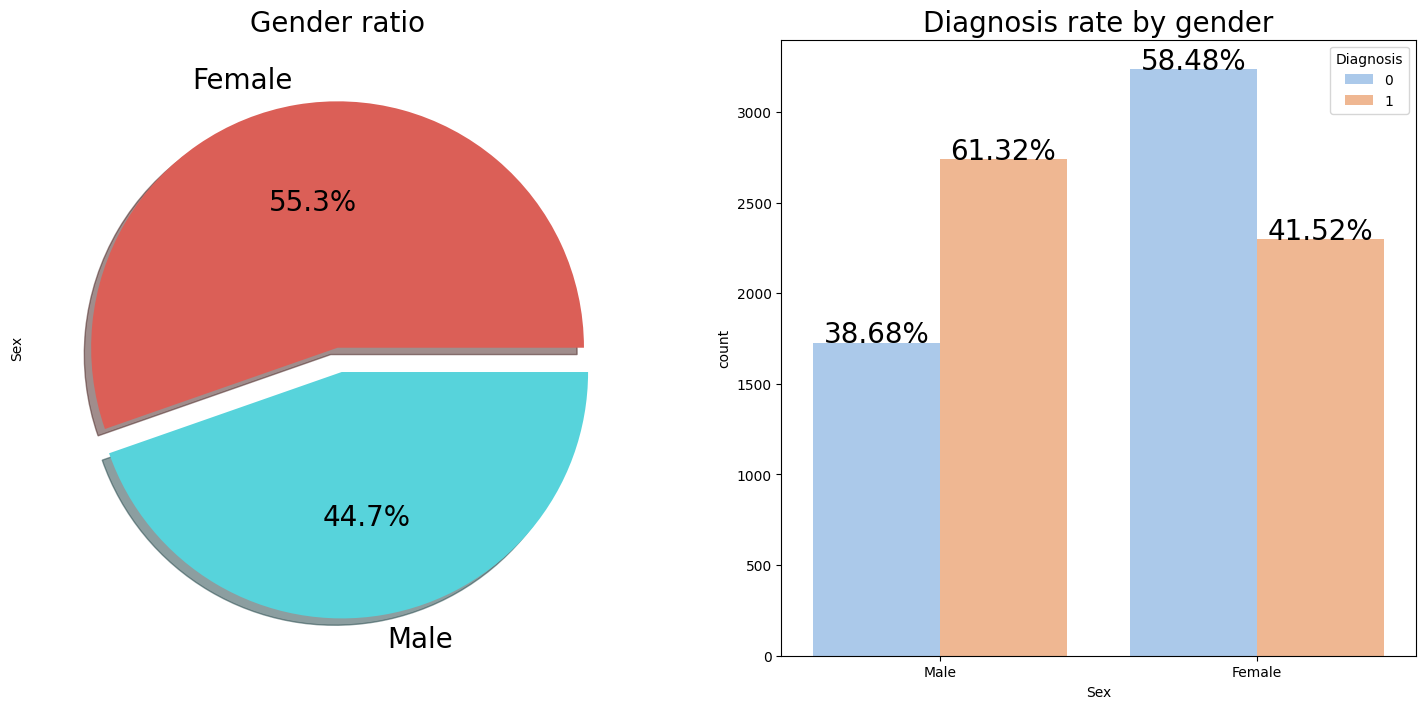

In [24]:
# 성별 별 진단률
color = sns.color_palette('hls',len(df['Sex'].value_counts()))
ct_sex = pd.crosstab(df['Sex'], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Gender ratio",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Sex', hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1)
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[1-int(p.get_x()+0.5)]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                fontsize=20)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by gender",fontsize=20)

In [25]:
sum_ct

Sex
Female    5535
Male      4465
dtype: int64

<Axes: xlabel='Delusion', ylabel='Density'>

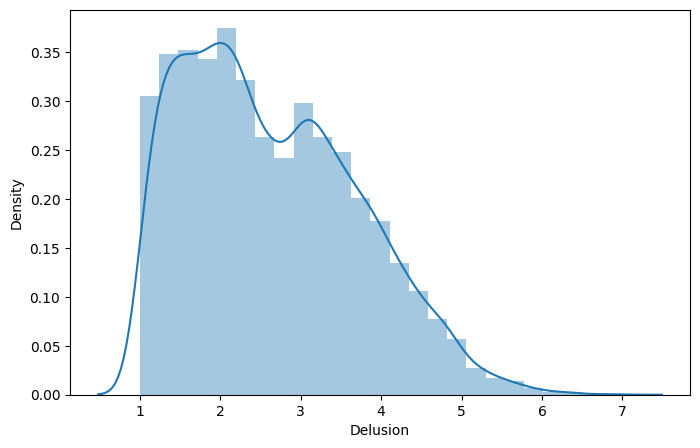

In [26]:
# Delusion 분포 알아보기
plt.figure(figsize=(8, 5))
sns.distplot(df['Delusion'], bins=25)

Text(0.5, 1.0, 'Diagnosis rate by Race')

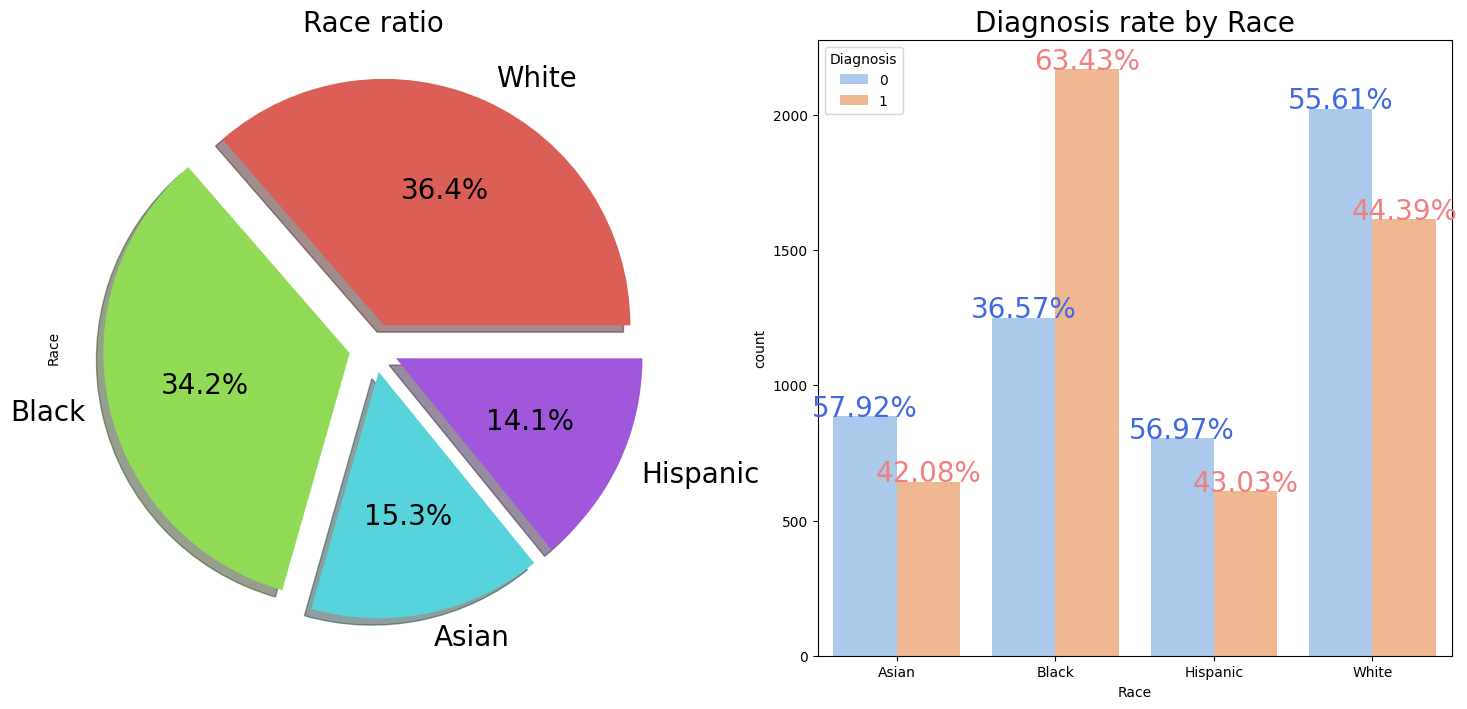

In [27]:
# 인종 별 진단률
color = sns.color_palette('hls',len(df['Race'].value_counts()))
ct_sex = pd.crosstab(df['Race'], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df['Race'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Race ratio",fontsize=20)
palette1=sns.color_palette('pastel',2)
color_list=['royalblue','lightcoral']
color_idx=-1
p2=sns.countplot(x='Race', hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
for p in ax[1].patches:
    idx=int(p.get_x()+0.5)
    # print(idx)
    if idx==0:
            color_idx+=1
    if p.get_y() + p.get_height()!=0:
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=20)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Race",fontsize=20)

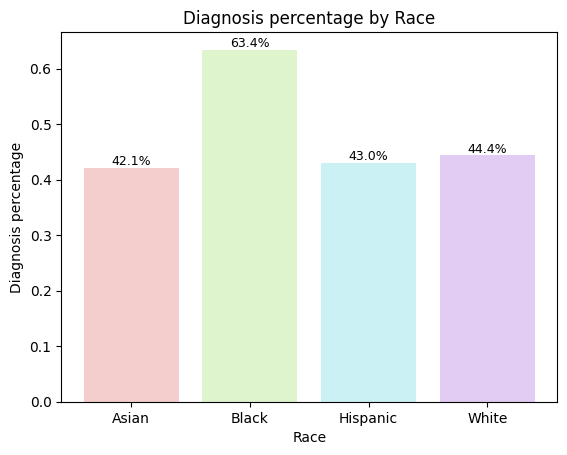

In [28]:
colors = sns.color_palette('hls',4) ## 색상 지정
bar=plt.bar(df[['Race', 'Diagnosis']].groupby(['Race']).mean().index, df[['Race', 'Diagnosis']].groupby(['Race']).mean().values.squeeze(), color = colors, alpha = 0.3)
for rect in bar:
    height = rect.get_height()
    if height==1 or height==0:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height*100}%", ha='center', va='bottom', size = 8)
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height*100:.1f}%", ha='center', va='bottom', size = 9)
plt.xlabel('Race', fontsize=10)
plt.ylabel('Diagnosis percentage', fontsize=10)
plt.title('Diagnosis percentage by Race')
plt.show()

인종별 진단결과를 시각화 했을 때
다른 인종은 진단결과 1인 비율이 55-58로 퍼센트로 유사했으나
Black 인종만이 다른 세 인종과 다르게 진단결과 1의 비율이 63퍼센트로 압도적으로 높았다.
따라서 Race 변수를 인종이 Black인지 아닌지를 나타내는 파생변수인 Isblack(0 or 1 값을 가지는 Bool형 변수)으로 사용할 수 있을 것이다

In [29]:
# 분석을 위해 df 복사
df2=df.copy()

In [30]:
df2['Delusion']

0       3.544660
1       2.077573
2       3.076944
3       3.657648
4       3.452163
          ...   
9995    3.604946
9996    2.537695
9997    2.297858
9998    2.560603
9999    2.582064
Name: Delusion, Length: 10000, dtype: float64

In [31]:
# 분석을 위해 결측치 제거
df2=df2.dropna(subset=['Delusion'])

In [32]:
# 상관관계를 알아보기 위해 반올림
df2['Delusion']=df2['Delusion'].round().astype(int)
df2['Rumination']=df2['Rumination'].round().astype(int)

In [33]:
df2['Delusion']

0       4
1       2
2       3
3       4
4       3
       ..
9995    4
9996    3
9997    2
9998    3
9999    3
Name: Delusion, Length: 9516, dtype: int64

In [34]:
df2['Rumination']

0       6
1       5
2       4
3       8
4       3
       ..
9995    9
9996    7
9997    8
9998    4
9999    3
Name: Rumination, Length: 9516, dtype: int64

In [35]:
df2['Delusion'].value_counts()

2    3261
3    2537
4    1611
1    1557
5     483
6      64
7       3
Name: Delusion, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Delusion')

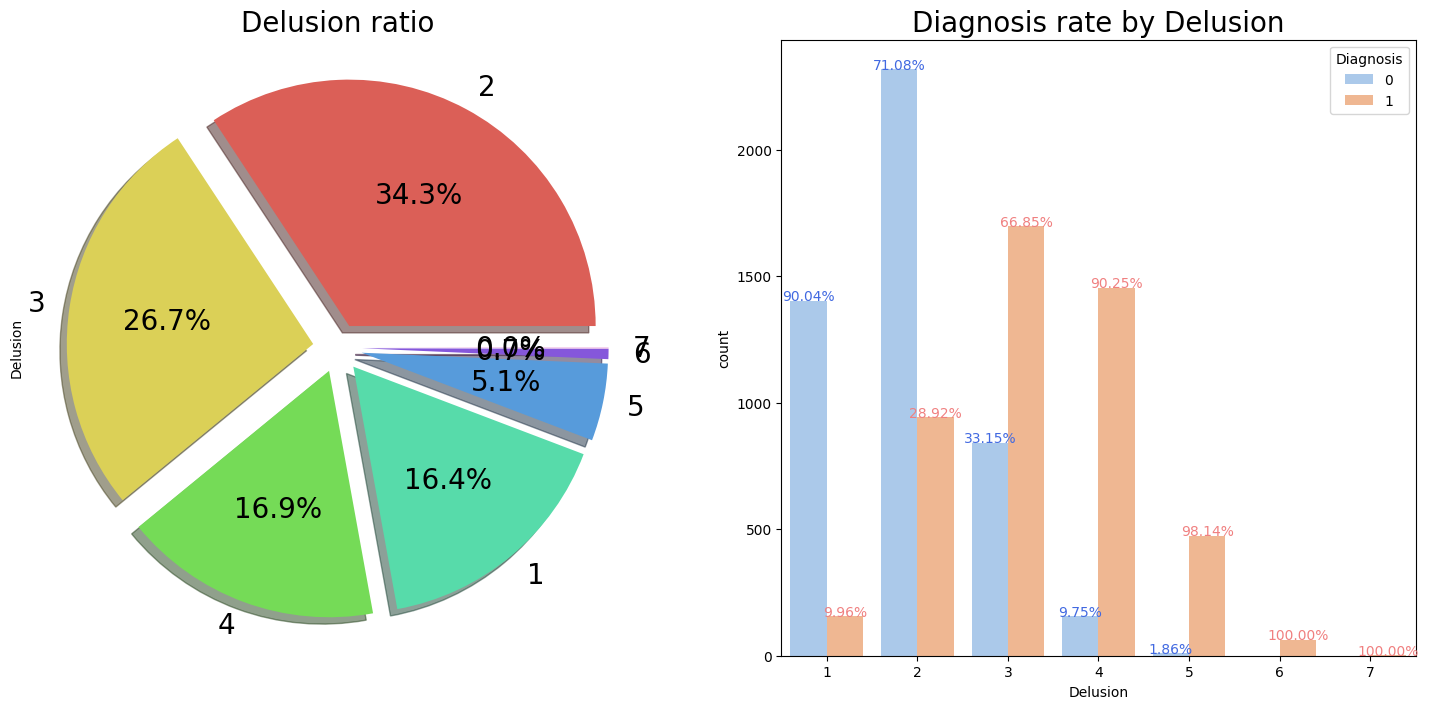

In [36]:
# Delusion 별 진단률
color = sns.color_palette('hls',len(df2['Delusion'].value_counts()))
ct_sex = pd.crosstab(df2['Delusion'], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Delusion'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Delusion ratio",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Delusion', hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-1
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Delusion",fontsize=20)

Delusion이 증가할수록 Diagnosis가 1인 비율이 높아진다.
Delusion의 정도는 Diagnosis에 큰 영향을 미친다.

In [37]:
df['Rumination'].describe()

count    10000.000000
mean         5.684392
std          1.889586
min          0.457384
25%          4.246898
50%          5.340179
75%          7.282476
max          9.999307
Name: Rumination, dtype: float64

In [38]:
df['Rumination'].isna().sum()

0

In [39]:
df2=df.copy()

In [40]:
# 분석을 위해 범주화(반올림)
df2['Rumination']=df2['Rumination'].round().astype(int)

In [41]:
df2['Rumination'].value_counts()

5     2231
4     2024
6     1345
8     1281
7     1103
3      857
9      787
2      208
10     149
1       14
0        1
Name: Rumination, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Rumination')

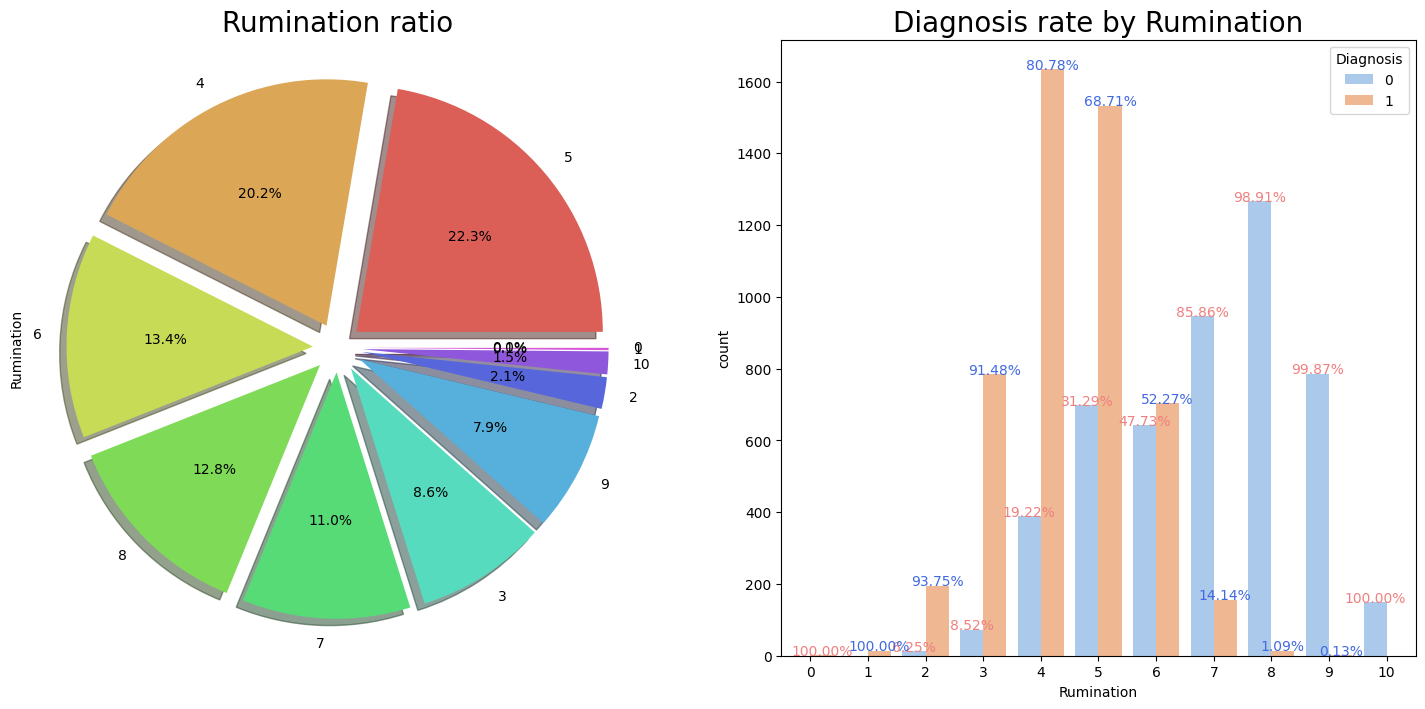

In [42]:
# Rumination 별 진단률
color = sns.color_palette('hls',len(df2['Rumination'].value_counts()))
ct_sex = pd.crosstab(df2['Rumination'], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Rumination'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=10)
p.set_title("Rumination ratio",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Rumination', hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-1
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Rumination",fontsize=20)

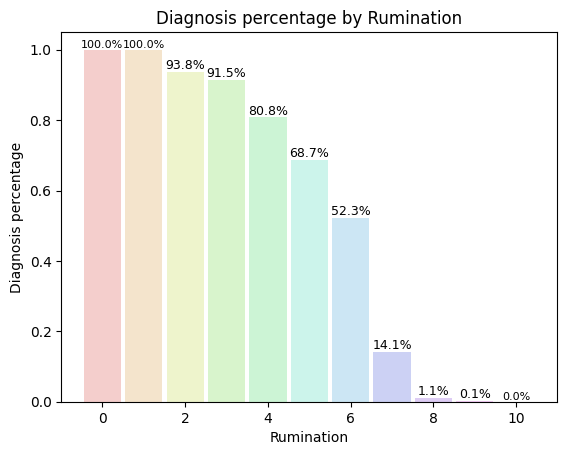

<Figure size 2000x800 with 0 Axes>

In [43]:
colors = sns.color_palette('hls',len(sum_ct)) ## 색상 지정
bar=plt.bar(df2[['Rumination', 'Diagnosis']].groupby(['Rumination']).mean().index, df2[['Rumination', 'Diagnosis']].groupby(['Rumination']).mean().values.squeeze(), color = colors, alpha = 0.3,width=0.9)
# for p in bar.patches:
#     height = p.get_height()
#     bar.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
for rect in bar:
    height = rect.get_height()
    if height==1 or height==0:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height*100}%", ha='center', va='bottom', size = 8)
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height*100:.1f}%", ha='center', va='bottom', size = 9)
    # '%.1f' % height
plt.xlabel('Rumination', fontsize=10)
plt.ylabel('Diagnosis percentage', fontsize=10)
plt.title('Diagnosis percentage by Rumination')
plt.figure(figsize=(20,8))
plt.show()

분석 결과 Runinatoin이 높을 수록 Diagnosis의 비율이 낮아지는 것을 확인할 수 있다.
즉 Rumination 값이 높을 수록 편집증일 확률이 낮아진다는 것이다.

In [44]:
df2.isna().sum()

Diagnosis           0
Sex                 0
Race                0
Housing             0
Delay               0
Anhedonia           0
DepMood             0
Sleep               0
Tired               0
Appetite            0
Rumination          0
Concentration       0
Psychomotor         0
Delusion          484
Suspicious          0
Withdrawal        539
Passive             0
Tension             0
UnusualThought      0
Income            201
dtype: int64

In [45]:
# 분석을 위해 결측치 제거 및 범주화
df2=df2.dropna(subset=['Delusion'])
df2['Delusion']=df2['Delusion'].round().astype(int)

<Figure size 800x500 with 0 Axes>

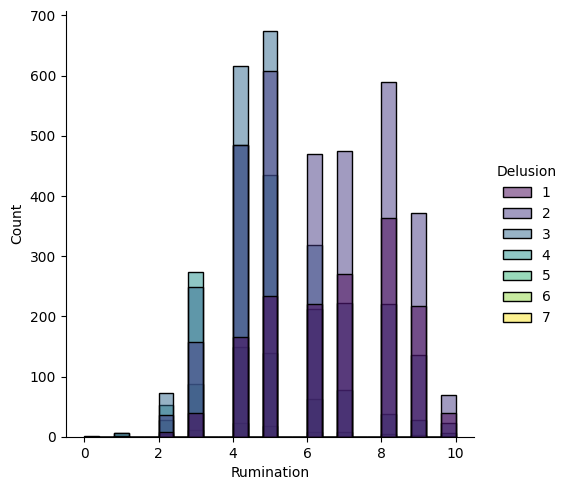

In [46]:
# Income 값과 Housing 값의 분포를 알아보자
plt.figure(figsize=(8, 5))
sns.displot(df2,x='Rumination',hue='Delusion', bins=25,palette='viridis')
# sns.displot(df2,x='Rumination',hue='Delusion', bins=25,palette='rainbow')

In [47]:
df2=df.copy()
df2['Rumination']=df2['Rumination'].round().astype(int)

Text(0.5, 1.0, 'Rumination rate by Gender')

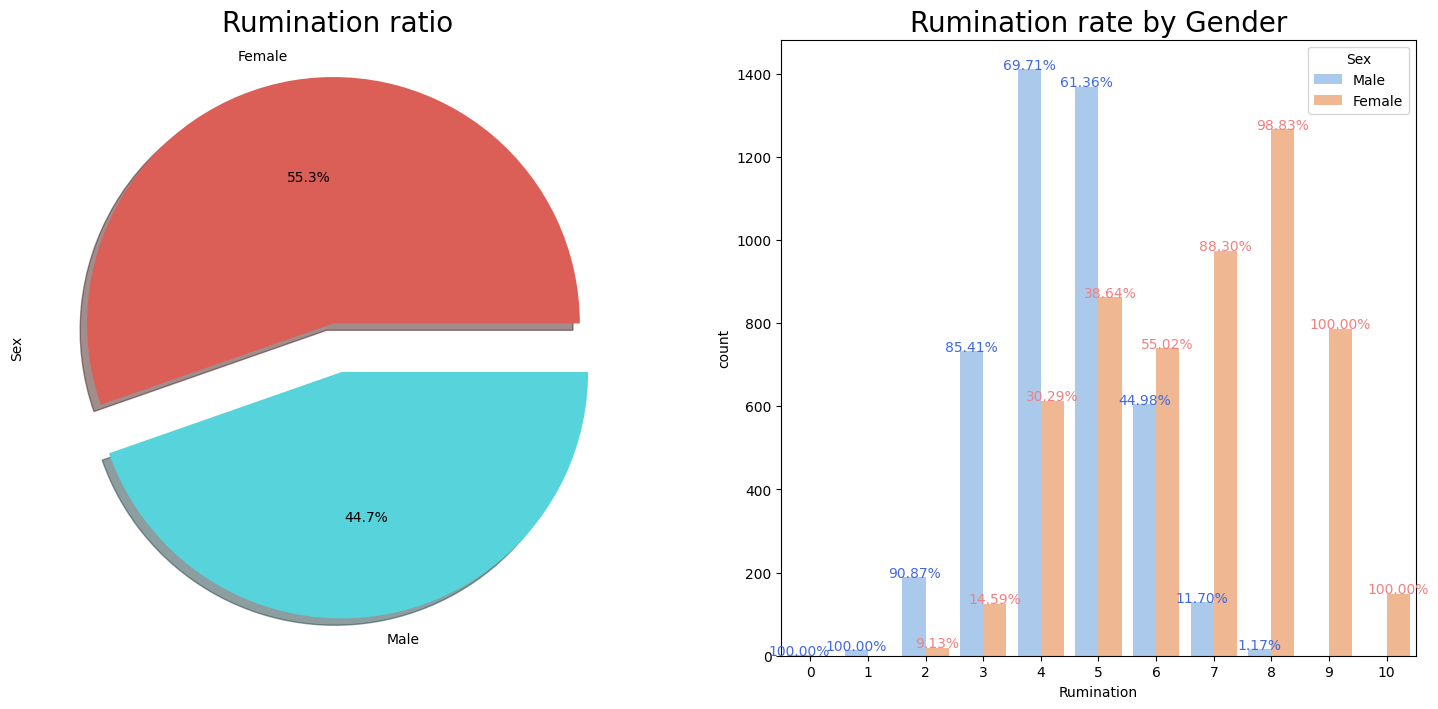

In [48]:
# Rumination 별 진단률
color = sns.color_palette('hls',len(df2['Sex'].value_counts()))
ct_sex = pd.crosstab(df2['Rumination'], df2['Sex'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=10)
p.set_title("Rumination ratio",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Rumination', hue = 'Sex', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==2:
            cnt+=1
        if idx==2 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Rumination rate by Gender",fontsize=20)

In [49]:
idx_ct

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Rumination')

In [50]:
ct_sex

Sex,Female,Male
Rumination,,
0,0,1
1,0,14
2,19,189
3,125,732
4,613,1411
5,862,1369
6,740,605
7,974,129
8,1266,15


In [51]:
df.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,Male,Asian,Stable,No,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,Male,Hispanic,Stable,No,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,Female,Black,Unstable,No,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,Female,Black,Stable,Yes,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,1,Male,White,Stable,Yes,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


In [52]:
df['Delay'].value_counts()

Yes    5127
No     4873
Name: Delay, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Delay')

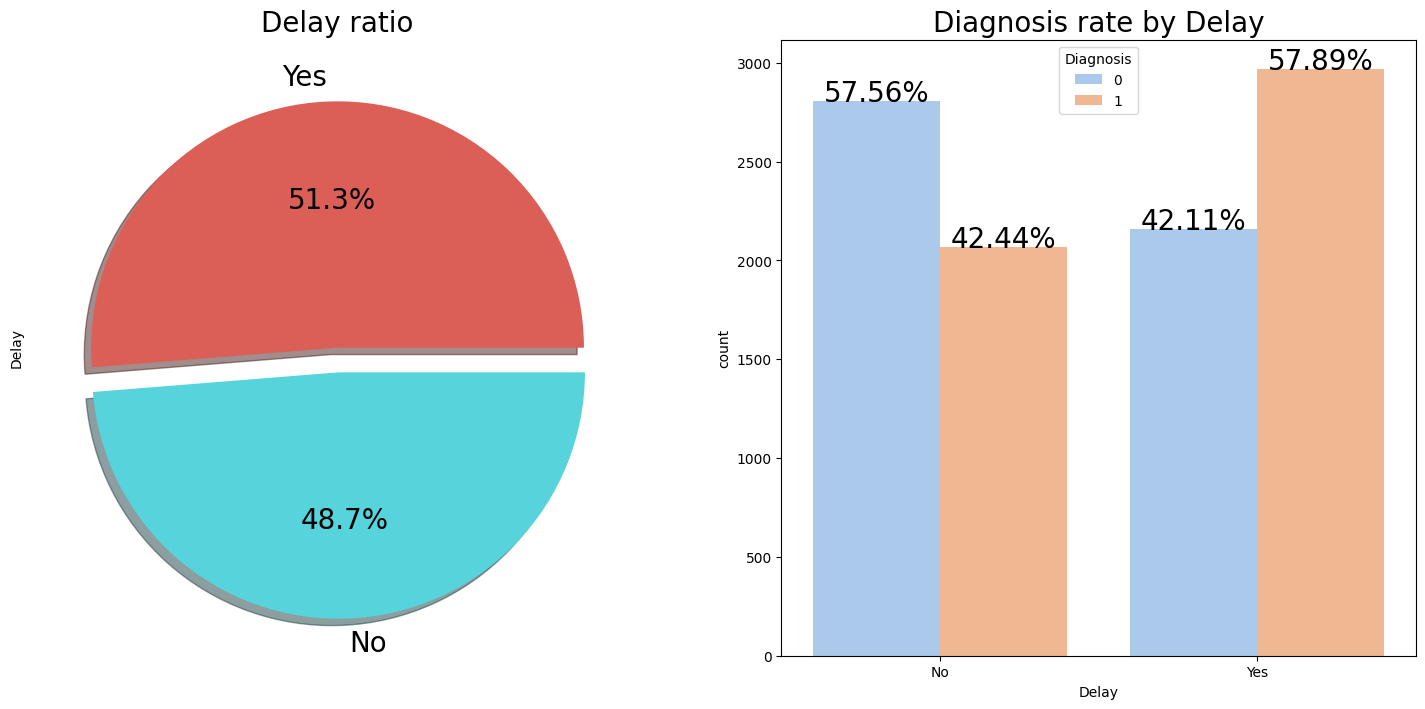

In [53]:
# Delay 별 진단률
color = sns.color_palette('hls',len(df['Delay'].value_counts()))
ct_sex = pd.crosstab(df['Delay'], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df['Delay'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Delay ratio",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Delay', hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1)
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[int(p.get_x()+0.5)]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                fontsize=20)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Delay",fontsize=20)

Delay 가 Yes 일 떄가 비교적 진단률이 높다.

In [54]:
df['Sleep'].value_counts()

6.538275    1
7.887998    1
7.539203    1
6.011694    1
5.424682    1
           ..
8.059344    1
6.232863    1
7.904804    1
4.261960    1
7.275342    1
Name: Sleep, Length: 10000, dtype: int64

In [55]:
df2=df.copy()

In [56]:
df2['Sleep']=df2['Sleep'].round().astype(int)

In [57]:
df2['Sleep'].value_counts()

7     3752
8     2502
6     2420
9      647
5      558
4       67
10      52
3        2
Name: Sleep, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Sleep time')

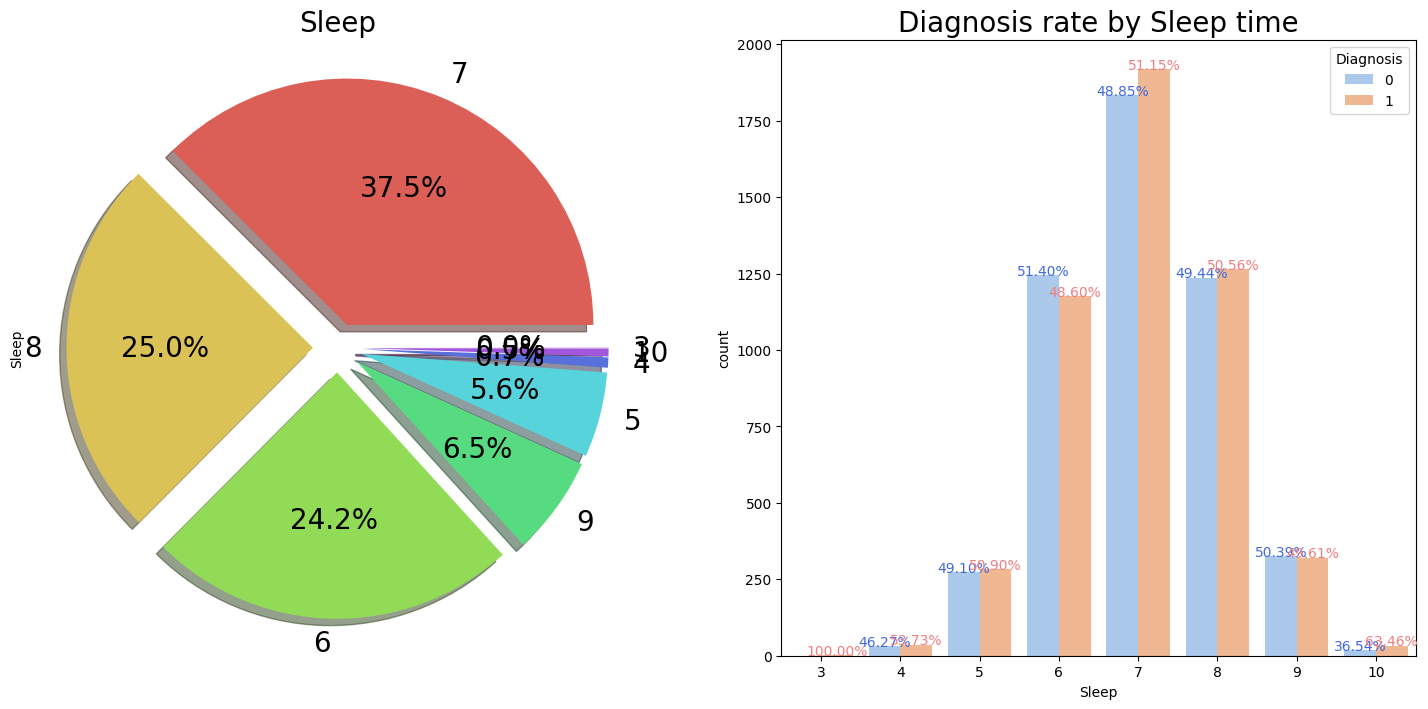

In [58]:
# Delusion 별 진단률
color = sns.color_palette('hls',len(df2['Sleep'].value_counts()))
ct_sex = pd.crosstab(df2['Sleep'], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Sleep'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Sleep",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Sleep', hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==3:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Sleep time",fontsize=20)

수면시간은 큰 영향을 미치지 않아 보임

In [59]:
df.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,Male,Asian,Stable,No,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,Male,Hispanic,Stable,No,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,Female,Black,Unstable,No,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,Female,Black,Stable,Yes,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,1,Male,White,Stable,Yes,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


In [60]:
df2['Tired']=df2['Tired'].round().astype(int)

In [61]:
df2['Tired'].value_counts()

5    3188
6    3098
4    1489
7    1485
8     342
3     329
2      36
9      29
1       4
Name: Tired, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Tired')

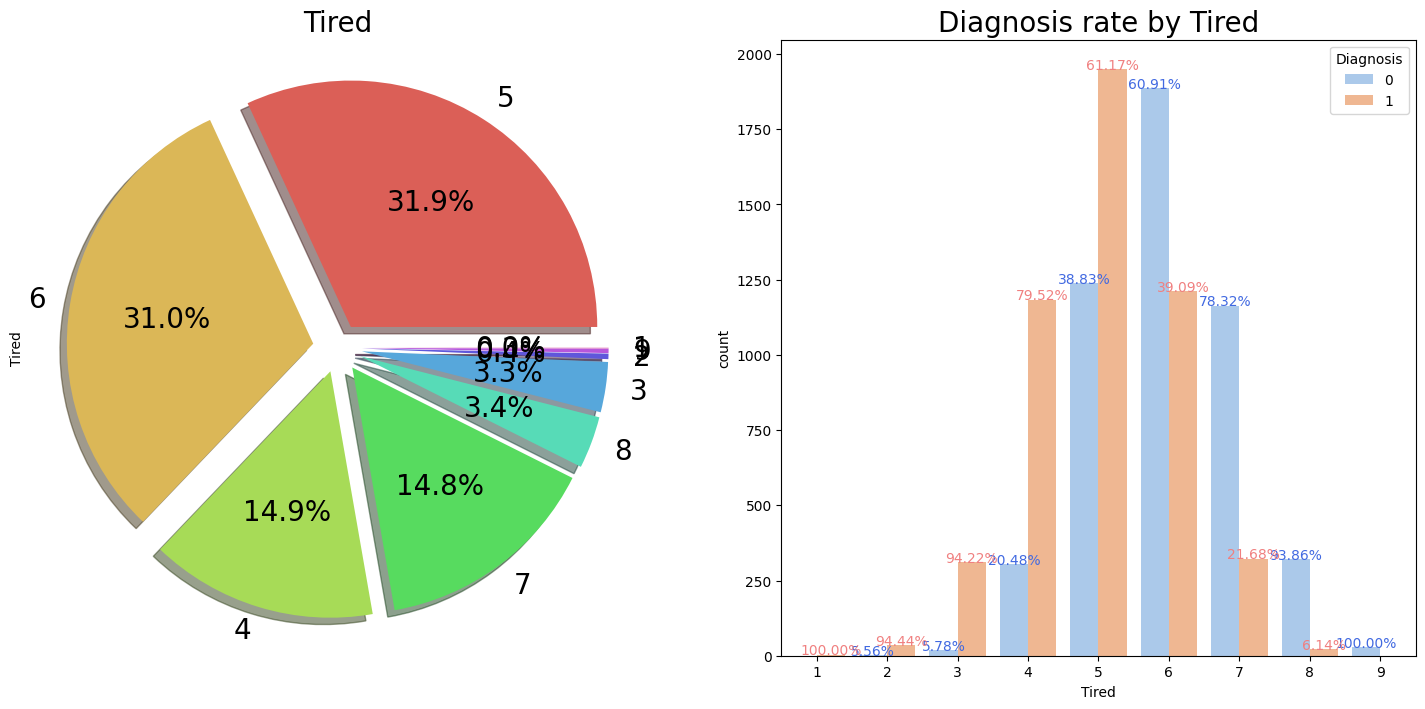

In [62]:
# Tired 별 진단률
color = sns.color_palette('hls',len(df2['Tired'].value_counts()))
ct_sex = pd.crosstab(df2['Tired'], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Tired'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Tired",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Tired', hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Tired",fontsize=20)

# 수면 시간과는 달리 피곤한 정도는 진단률에 큰 영향을 미침
# 개인이 느끼는 피곤함의 정도는 수면시간과 상관 없음

<Figure size 800x500 with 0 Axes>

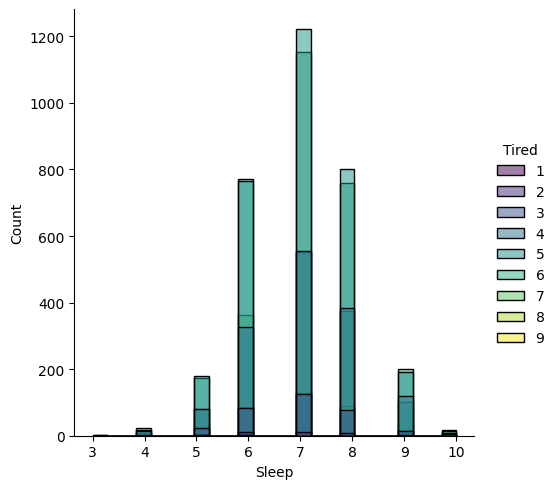

In [63]:
# Income 값과 Housing 값의 분포를 알아보자
plt.figure(figsize=(8, 5))
sns.displot(df2,x='Sleep',hue='Tired', bins=25,palette='viridis')

In [64]:
df2['Appetite']=df2['Appetite'].round().astype(int)

In [65]:
df2['Appetite'].value_counts()

5    3849
6    2460
4    2380
7     612
3     580
2      66
8      51
9       2
Name: Appetite, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Appetite')

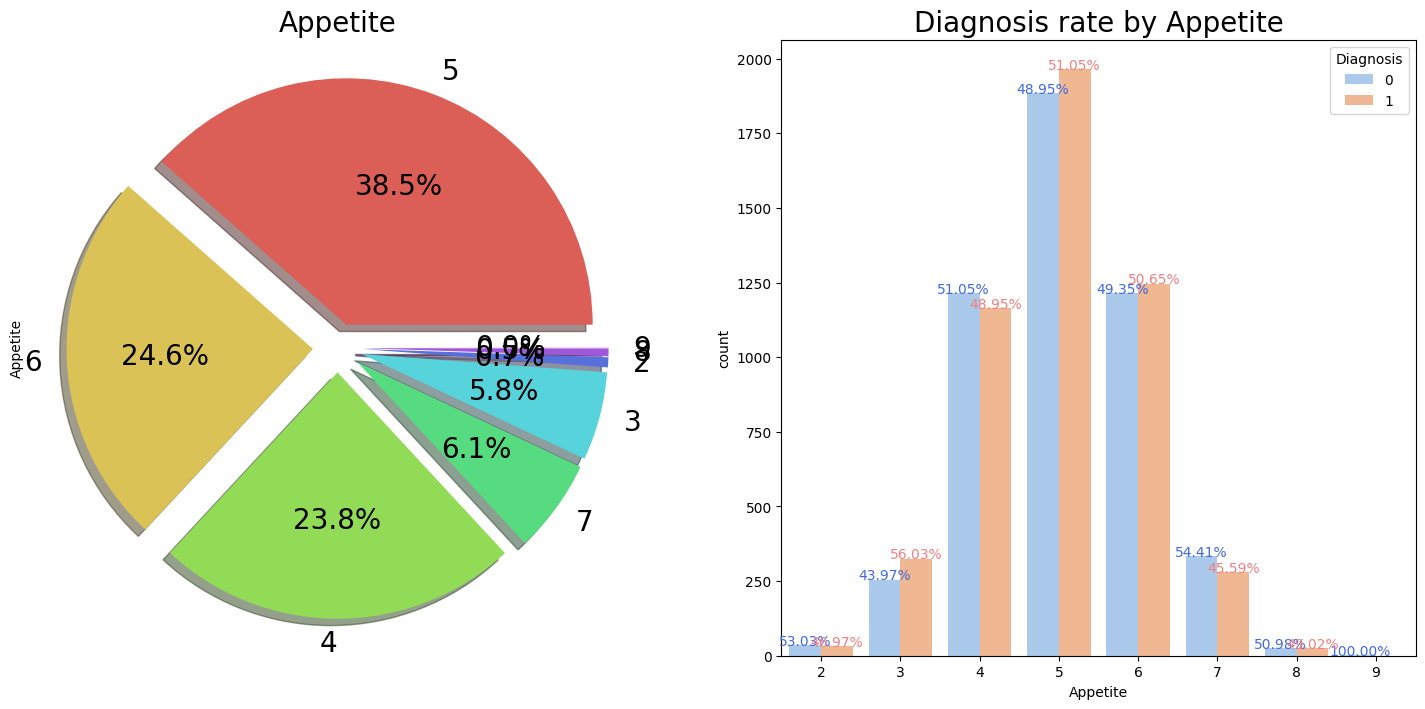

In [66]:
# Appetite 별 진단률
color = sns.color_palette('hls',len(df2['Appetite'].value_counts()))
ct_sex = pd.crosstab(df2['Appetite'], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Appetite'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Appetite",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Appetite', hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['red','royalblue','lightcoral']
color_idx=-0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Appetite",fontsize=20)

상관계수에서도 확인할 수 있듯이 Appetite는 진단률에 영향이 없다고 판단됨

In [67]:
df2['Concentration']=df2['Concentration'].round().astype(int)

In [68]:
df2['Concentration'].value_counts()

6     3163
7     3138
8     1546
5     1458
9      336
4      306
3       31
10      21
2        1
Name: Concentration, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Concentration')

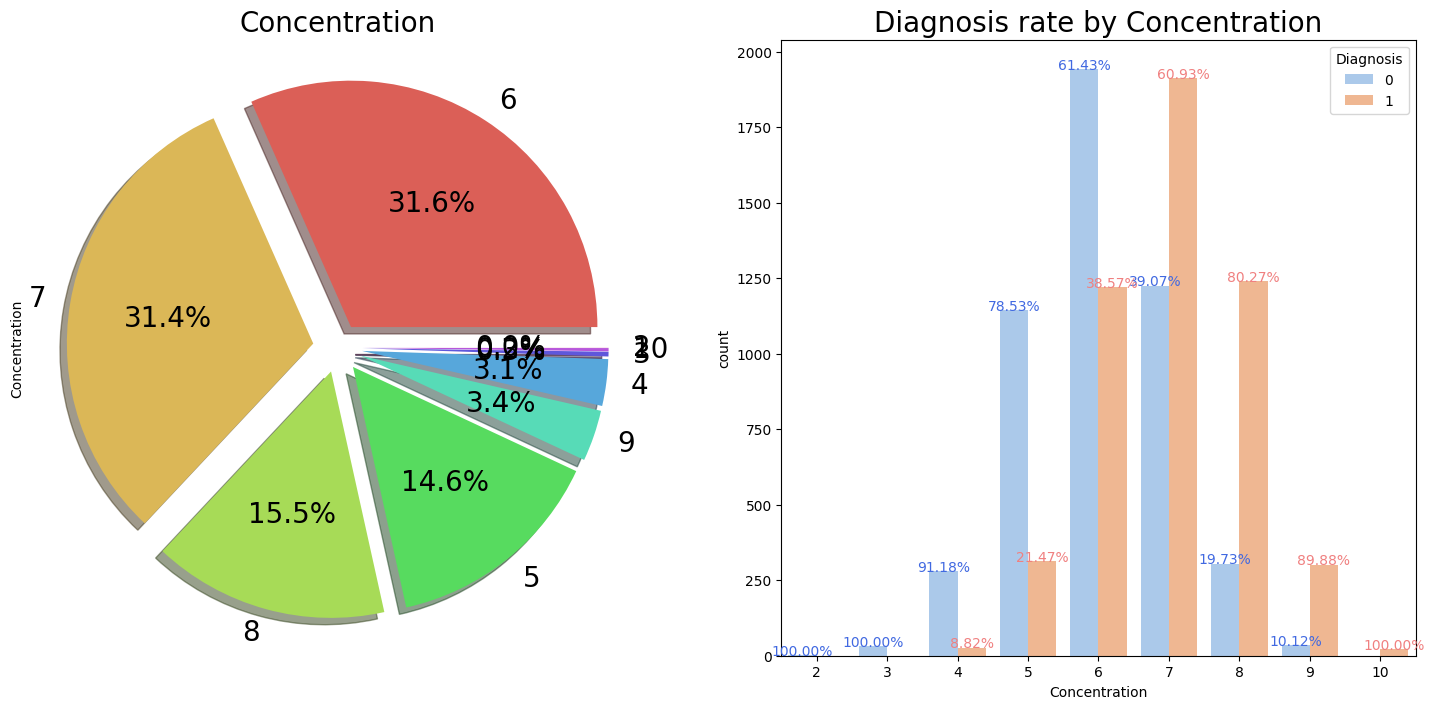

In [69]:
# Concentration 별 진단률
color = sns.color_palette('hls',len(df2['Concentration'].value_counts()))
ct_sex = pd.crosstab(df2['Concentration'], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Concentration'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Concentration",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Concentration', hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==4:
            cnt+=1
        if cnt==2 and idx==4:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Concentration",fontsize=20)

Concentration 값이 높아질수록 진단률이 높아진다.
이로 보아 원래 판단했던 '집중력'이 아닌 '집중력 장애'라는 의미의 변수인 것 같다.
Concectration은 진단률에 큰 영향을 미친다.

In [70]:
df2['Psychomotor']=df2['Psychomotor'].round().astype(int)

In [71]:
df2['Psychomotor'].value_counts()

5    3361
4    2846
6    1831
3    1249
7     417
2     244
8      28
1      23
9       1
Name: Psychomotor, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Psychomotor')

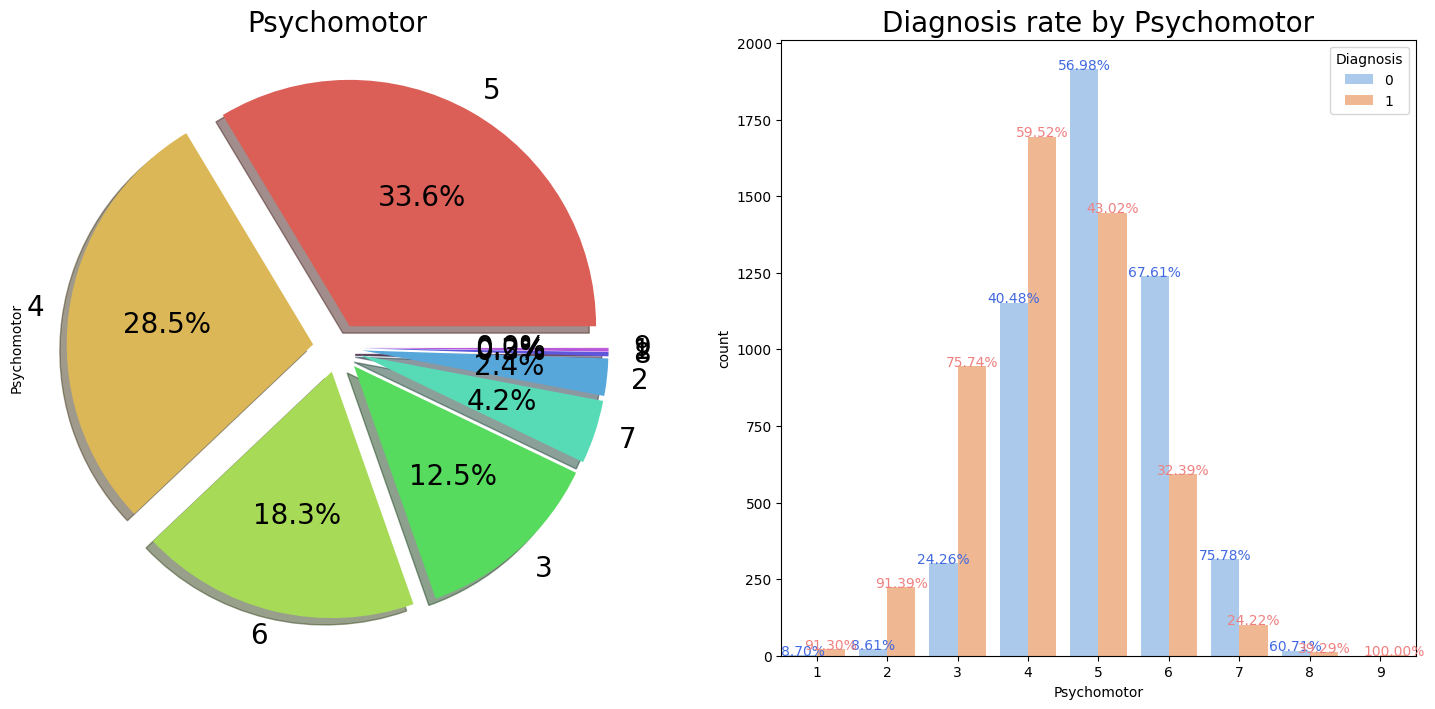

In [72]:
# Psychomotor 별 진단률
color = sns.color_palette('hls',len(df2['Psychomotor'].value_counts()))
ct_sex = pd.crosstab(df2['Psychomotor'], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2['Psychomotor'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title("Psychomotor",fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x='Psychomotor', hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if cnt==2 and idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by Psychomotor",fontsize=20)

psychomotor가 높을 수록 진단률이 낮아진다
psychomoter는 편집증보다 정동장애 증상과 관련이 있는 것 같다.

In [73]:
df2['Psychomotor'].value_counts()

5    3361
4    2846
6    1831
3    1249
7     417
2     244
8      28
1      23
9       1
Name: Psychomotor, dtype: int64

In [74]:
df2[df2['Psychomotor'] == 9]

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
2298,1,Female,White,Stable,Yes,5.647543,6.774177,7,5,5,3.7692,7,9,4.418097,4.106844,2.556898,4.318197,6.829843,3.98998,9.791014


In [75]:
name='Suspicious'
df2[name]=df2[name].round().astype(int)
df2[name].value_counts()

2    3296
3    3030
4    1737
1    1202
5     614
6     115
7       6
Name: Suspicious, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Suspicious')

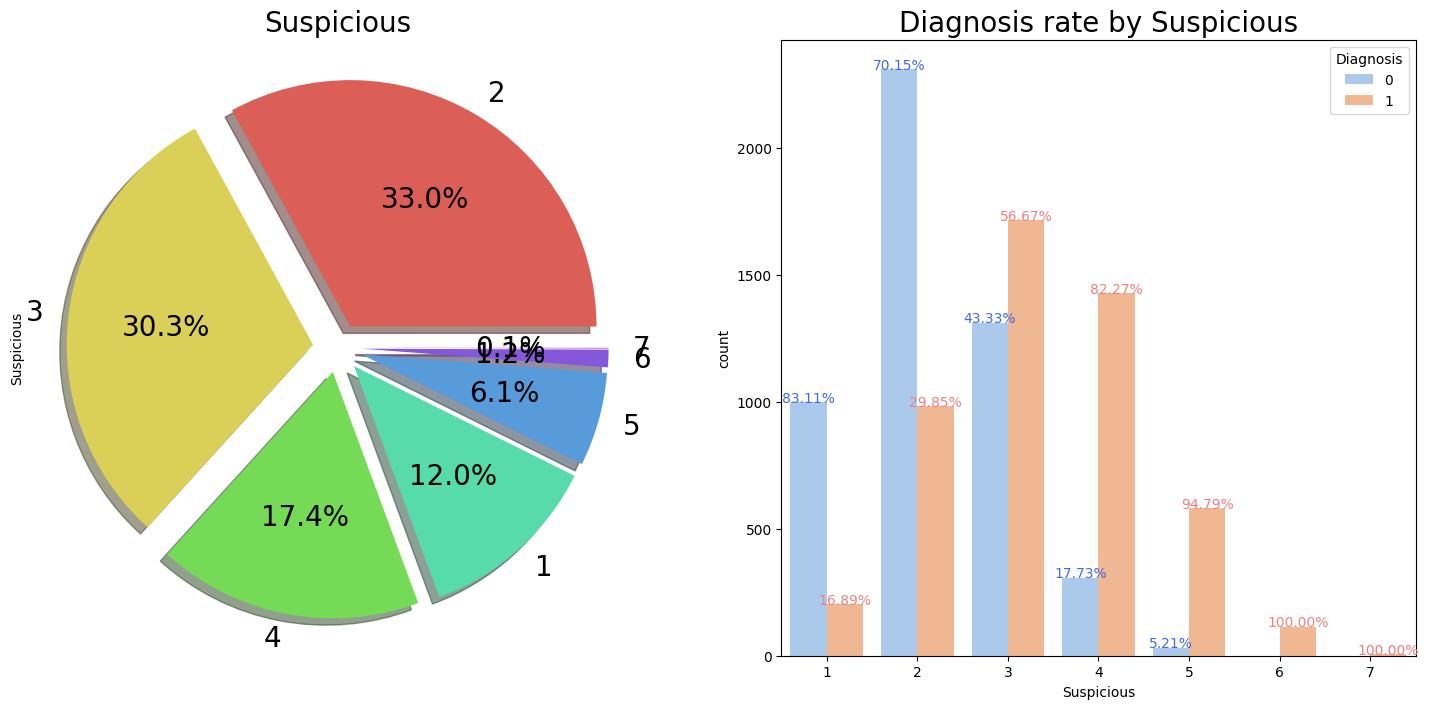

In [76]:
# Psychomotor 별 진단률
color = sns.color_palette('hls',len(df2[name].value_counts()))
ct_sex = pd.crosstab(df2[name], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2[name].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title(name,fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=name, hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if cnt==2 and idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+name,fontsize=20)

Suspicious 가 높아질 수록 진단률이 증가하는 것이 확실하게 보인다.

In [77]:
df3=df2.copy()
name='Withdrawal'
df3=df3.dropna(subset=[name])
df3[name]=df3[name].round().astype(int)
df3[name].value_counts()

4    2933
5    2369
3    2352
2     820
6     771
1     129
7      87
Name: Withdrawal, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Withdrawal')

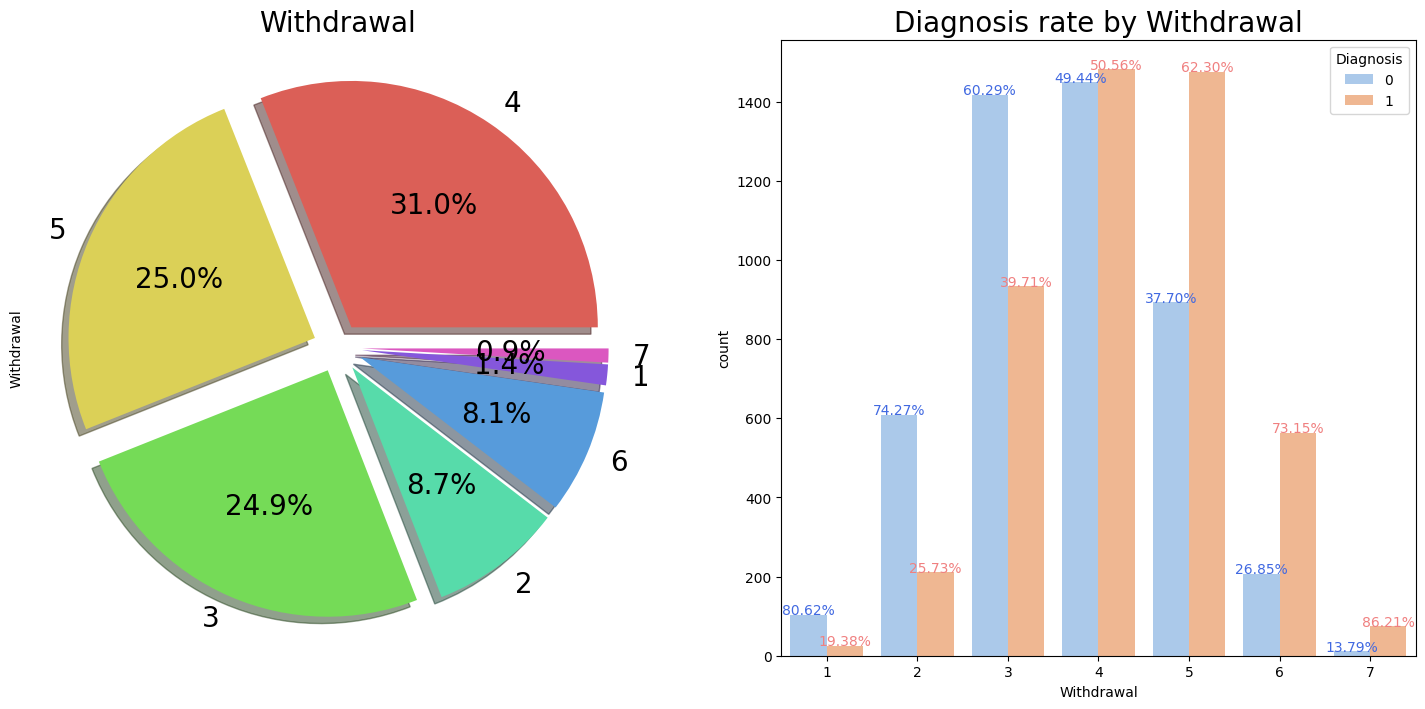

In [78]:
# withdrawal 별 진단률
color = sns.color_palette('hls',len(df3[name].value_counts()))
ct_sex = pd.crosstab(df3[name], df3['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df3[name].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title(name,fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=name, hue = 'Diagnosis', data = df3, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if cnt==2 and idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+name,fontsize=20)

Withdrawal 가 높아질 수록 진단률이 증가하는 것이 확실하게 보인다.




In [79]:
name='Passive'
df2[name]=df2[name].round().astype(int)
df2[name].value_counts()

5    3863
4    2516
6    2299
3     796
7     431
2      90
1       5
Name: Passive, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by Passive')

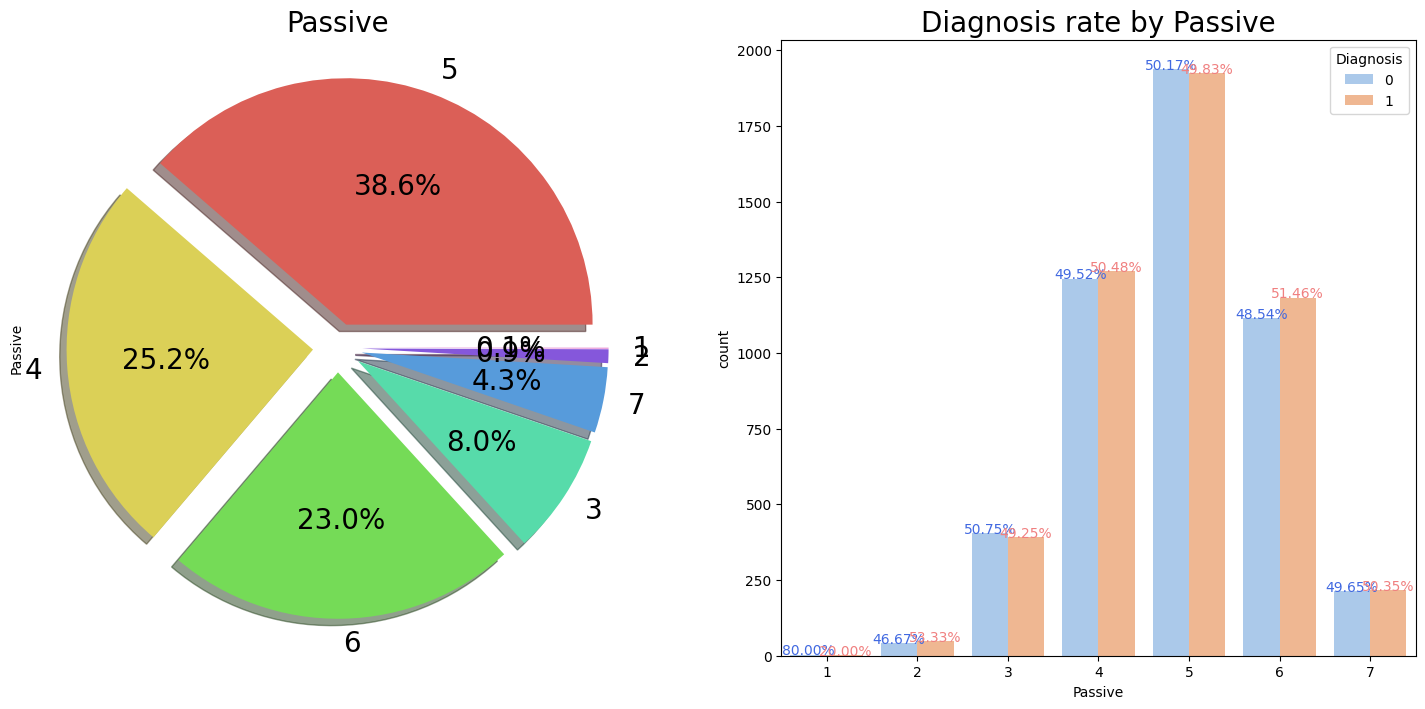

In [80]:
# Passive 별 진단률
color = sns.color_palette('hls',len(df2[name].value_counts()))
ct_sex = pd.crosstab(df2[name], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2[name].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title(name,fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=name, hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if cnt==2 and idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+name,fontsize=20)

Passive는 진단률에 영향을 미치지 않는다.

In [81]:
name='UnusualThought'
df2[name]=df2[name].round().astype(int)
df2[name].value_counts()

2    3732
3    2810
1    1747
4    1354
5     333
6      24
Name: UnusualThought, dtype: int64

Text(0.5, 1.0, 'Diagnosis rate by UnusualThought')

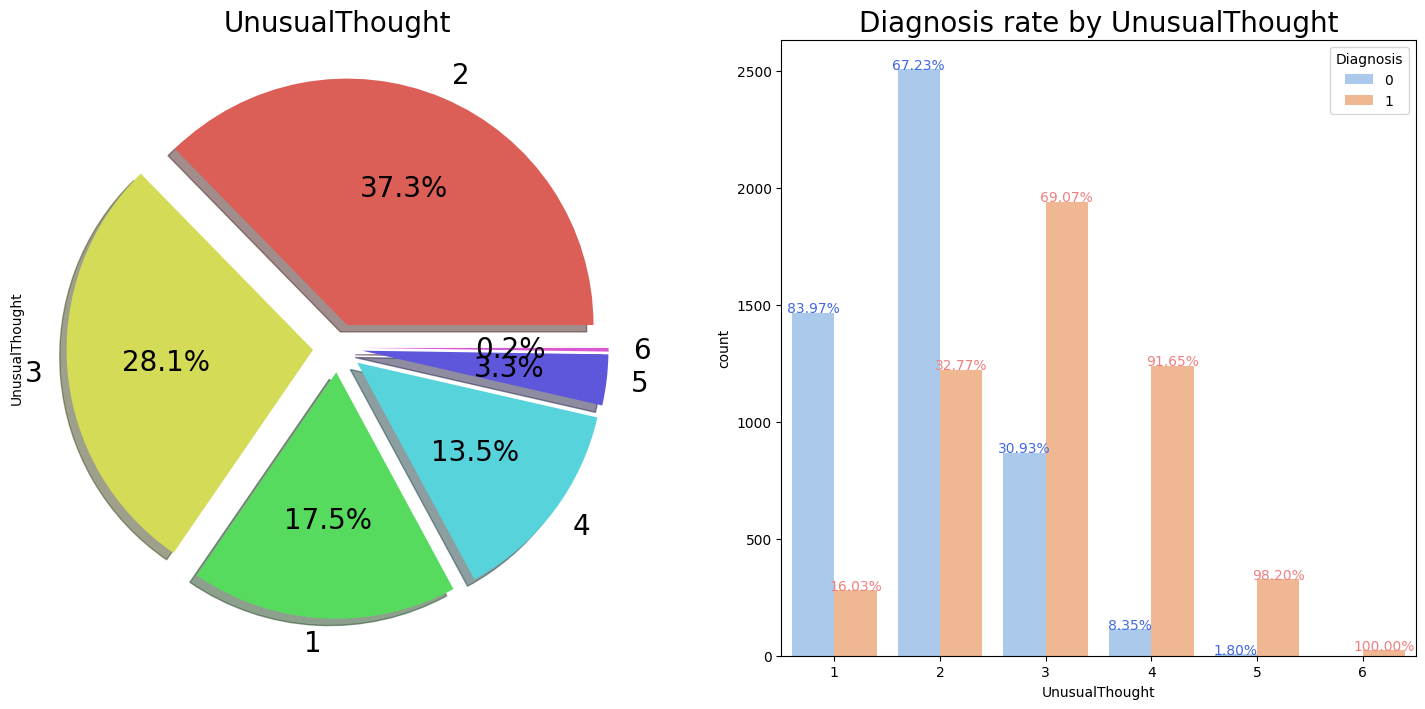

In [82]:
# UnusualThought 별 진단률
color = sns.color_palette('hls',len(df2[name].value_counts()))
ct_sex = pd.crosstab(df2[name], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2[name].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=color,fontsize=20)
p.set_title(name,fontsize=20)

palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=name, hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1)
color_list=['royalblue','lightcoral']
color_idx=-0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if cnt==2 and idx==1:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+name,fontsize=20)

UnusualThought 가 높아질 수록 진단률이 증가하는 것이 확실하게 보인다.


